<a href="https://colab.research.google.com/github/jin930303/AIStudy24/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 쇼핑몰에서 럭키백을 판매하기로 하였고, 럭키백에는 생선 7가지가 랜덤하게 들어있다.

단, 럭키백에 확률이 표시되어야함.(들어있는 생선의 당첨확률)

In [ ]:
# 럭키백의 확률
# 생선 7마리라고 가정
# 생선의 크기(Length), 무게(Weight), 두께(Width), 높이(Height), 대각선의 길이(Diagonal) 등

# K-최근접 알고리즘을 이용해보면 회귀??? 분류???
# 확률을 알고 싶은 것이기 떄문에 회귀 사용

# 샘플 10마리 중 농어 3마리이면 -> 3 / 10 = 0.3
# 빙어 5마리이면 -> 5 / 10 = 0.5
# 돔 2마리이면 -> 2 / 10 = 0.2

# 사이킷런의 K-최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산도 해줌
#샘플데이터 준비
#로지스틱 회귀 : 럭키백 환율
import pandas as pd # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data')  #웹에 있는 파일을 가져옴
fish.head()     # 제일 위쪽 데이터 5개를 보여줌
# 어종(species),무게 길이 대각선, 키 ,너비(두께)

In [ ]:
print(pd.unique(fish['Species']))       # 유니크하게 종류를 출력

In [ ]:
# bream : 브림(도미)
# Roach : 로치(대구)
# Whitefish : 잉어
# Parkki : 붕어
# Perch : 농어
# Pike : 감물치
# Smelt : 빙어

# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])   #앞에서 5개만 출력


In [ ]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish['Species'] 이렇게 하면 2차원 배열됨(금지)
print(fish_target[:5])

In [ ]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input , test_input , train_target , test_target = train_test_split(fish_input, fish_target , random_state=42)
print(train_input.shape, test_input.shape)
# 훈련용 119개, 5개의 특성
# 테스트용 40개, 5개의 특성

In [ ]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()        # 사이킷런의 전처리용(스케일 조정)     -> 표준점수화
ss.fit(train_input)
train_scaled =ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

In [ ]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier  # 분류용

kn = KNeighborsClassifier(n_neighbors=3)            # 이웃 3개 참고
kn.fit(train_scaled, train_target)                  # 훈련시작

print(kn.score(train_scaled, train_target))         # 훈련점수 0.89
print(kn.score(test_scaled,test_target))            # 테스트점수 0.85

In [ ]:
# 전에는 0과 1을 찾는 이진분류였지만 지금 타겟에 7개의 어종을 넣었음
print(kn.classes_)
# 7개의 생선 종류가 들어있다. 2개이상 클래스가 포함된 문제를 다중 분류라고 함


In [ ]:
print(kn.predict(test_scaled[:5]))
# 처음 5개의 샘플을 타깃값 예측해보면 아래와 같다.

In [ ]:
print(test_scaled[:5])

In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# 사이킷런이 번거로운 연산을 수행해줌으로써 쉽게 결과가 나옴
print(np.round(proba, decimals=4))
# 소수점 4번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch  Pike   Roach   Smelt Whitefish  이 순서

In [ ]:
# ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch'] 결과를 확인할 수 있다.

In [ ]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인이 필요하다.
distances, indexes = kn.kneighbors(test_scaled[3:4])                # 4번째 값을 자세히 보자
print(train_target[indexes])
#                Perch          Roach
# [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3   , Roach 1/3  이기 때문에 7개를 확률로 제공되지 못한다.
# 이유 : n_neighbors=3 으로 설정했기 때문에


In [ ]:
# 알고리즘 변경 해보자  :로지스틱 회귀(LogisticRegression)
# 로지스틱 회귀는 사이킷런에서 제공함    from sklean.linear_model import LogisticRegression
# 로지스틱 회귀는 이름이 회귀이지만 분류모델이다.
# 선형회귀와 동일하게 선형 방정식을 학습한다.
# z = a * (weight) + b * (length) + c * (Diagonal) + d * (height) + e * (width) + f
# a, b, c, d, e ,f 는 각 항목에 대한 가중치(중요도)이다.
# z 는 어떤 값도 가능하다. -> 확률이 되려면 0 ~ 1 (0% ~100%) 사잇값
# z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸는 방법은 -> 시그모이드 함수, 로지스틱 함수



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드함수용 : z가 무한하게 큰 음수일 경우 0에 가까워짐, z가 무한하게 큰 양수일 경우 1에 가까워짐
z= np.arange(-5,5,0.1)  # -5 ~ 5 까지 0.1 간격으로 배열 생성
phi = 1 / (1+ np.exp(-z))       # np.exp() 함수로 시그모이드 적용

plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


In [ ]:
# 선형 방정식의 출력 z 의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.
# 이렇게 하면 0 ~ 1 사이 값을 0 ~ 100% 확률로 해석할 수 있다.

# 훈련전에 2진분류부터 알아보자.
# 2진분류인 경우에는 시그모이드 함수 출력이 0.5보다 크면 양성 , 0.5보다 작으면 음성으로 판단.
# 단 0.5가 나오면 라이브러리마다 좀 다르다. 사이킷런은 음성으로 판단.

In [ ]:
# 로지스틱회귀로 이진분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. (불리언 인덱싱)
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])    #불리언 인덱싱
# 결과 : True 값만 출력됨

In [ ]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와, 빙어(Smelt)의 행만 골라내보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                       Bream(도미) or Smelt(빙어)
# bream_smelt_indexes에 도미와 빙어일 경우 True 이고 나머지는 False가 들어있다.
# 이 배열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()                       # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)   # 훈련      -> 2진 분류로 나옴

In [ ]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자
print(lr.predict(train_bream_smelt[:5]))    # 도미 4개 빙어 1개

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))      # 확률 확인 (predict_proba)

In [ ]:
# 샘플마다 2개의 확률이 출력된다.   (시그모이드 함수)
# 첫번째 열이 0(음성)에 대한 확률, 두번째 열이 1(양성)에 대한 확률이다.
# 사이킷런의 타겟 값은 알파벳 순으로 정렬해서 사용함.

print(lr.classes_)  #   Smelt(빙어)가 양성으로 사용됨
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다.   (나머지는 도미로 예측함)
# 만약 도미(Bream)를 양성클래스로 사용하고 싶으면
# 전에 전처리에서 Bream인 타겟값을 1로 만들어야함


In [ ]:
# 로지스틱 회귀로 학습한 계수(중요도)를 봐보자.
print(lr.coef_,lr.intercept_)

In [ ]:
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형 방정식에 대입해서 결과가 나옴
# z = a * (weight) + b * (length) + c * (Diagonal) + d * (height) + e * (width) + f
# z = -0.40451732 * (weight) + -0.57582787 * (length) + -0.66248158 * (Diagonal) +  -1.01329614 * (height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z 값을 출력해보자
print(decisions)

In [ ]:
# 이 z 값을 시그모이드 함수에 통과 시키면 확률을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()
from scipy.special import expit

print(expit(decisions)) # phi = 1 / (1 + np.exp(-z))
# 여기까지가 2개의 물고기 분류하는 방법
#   도미      빙어        도미        빙어        도미
# [0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

In [ ]:
# 다중분류로 진행해보기 (2진분류는 True 아니면 모두 False 처리된다.)
# 현재 어종이 7개 , 로지스틱 회귀로 분류를 학습함

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경고문구가 나와서 1000으로 향상 시킬것.
# LogisticRegression 기본적으로 릿지회귀와 같은 계수를 제곱해서 규제한다. (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절하였다. -> alpha가 크면 규제도 커진다.
# LogisticRegression 규제를 제어하는 매개변수가 C로 되어있다. -> C가 작으면 규제가 커진다.(기본 1)
# 규제를 완화하기 위해서 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter= 1000)       # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled , train_target)

print(lr.score(train_scaled, train_target))         # 93%
print(lr.score(test_scaled,test_target))            # 92.5% 과소나 과대적합이 아닌 듯 하다.

In [ ]:
print(lr.predict(test_scaled[:5]))      # 결과 분석시 다중분류로 나온다.

In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
# Bream Parkki Perch Pike Roach Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003]
# [0.    0.003 0.044 0.    0.007 0.946 0.   ]
# [0.    0.    0.034 0.934 0.015 0.016 0.   ]
# [0.011 0.034 0.305 0.006 0.567 0.    0.076]
# [0.    0.    0.904 0.002 0.089 0.002 0.001]]

In [ ]:
print(lr.classes_)  # 알파벳 순으로 정렬되어 보임
# 7개의 클래스가 명확하게 구분이 된다.

In [ ]:
# 다중 분류일때 선형 방정식
print(lr.coef_.shape,lr.intercept_.shape)
# (7,5)  이 데이터는 5개의 특성을 사용, 7개의  행을 가짐
# (7,)   7개의 행을 가짐    - > 2진 분류에서 보았던 z를 7개 계산함
# 다중분류는 클래스마다 z값을 하나씩 계산한다는 의미
# 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스로 사용된다.

In [ ]:
# 그러면 확률은? 이진분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환했었다.
# 그러나 다중 분류에서는 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

#소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e&z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum... s7   = e^z7 / e_sum -> s1 ~s7 까지 모두 더하면 분모가 같아져 1이 된다.

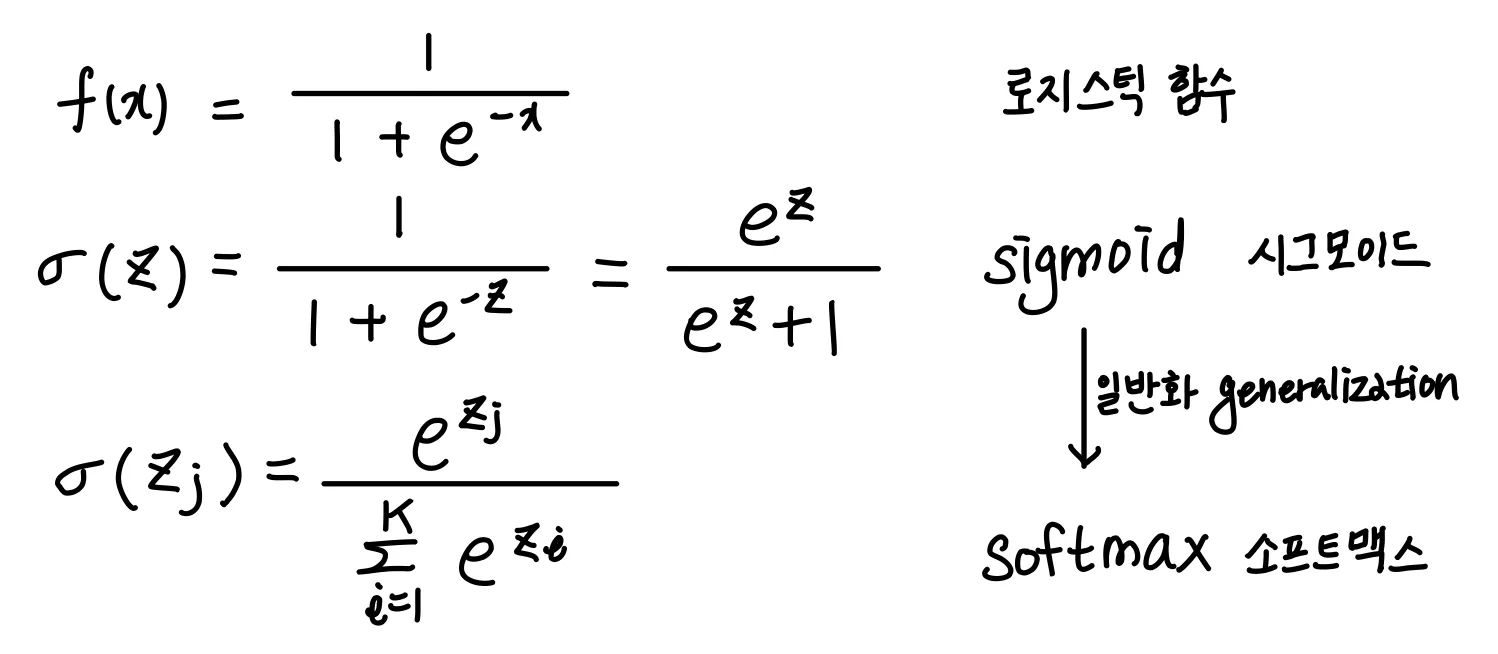

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")
for idx,z in enumerate(decision):
    print(f"{idx}번째 샘플의 z값\n{z}\n")

In [ ]:
from scipy.special import softmax
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(2)*100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con, columns=class_))

#소프트맥스 함수로 예측 확률 구하기

#       Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
#    0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
#   1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
#   2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
#   3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
#   4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
